In [6]:
import numpy as np
import skimage
import skimage.data
import skimage.io
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from matplotlib.patches import Patch

# 1. Read Dataset

In [ ]:
base = "dataset"
paths = {
    "label": os.path.join(base, "label_images_semantic"),
    "orig": os.path.join(base, "original_images"),
    "rgb":  os.path.join(base, "RGB_color_image_masks")
}

orig_files = sorted([f for f in os.listdir(paths["orig"]) if f.endswith(".jpg")])
df = pd.read_csv(os.path.join(base, "class_dict_seg.csv"))
color_items = [(row["name"], (int(row["r"]), int(row["g"]), int(row["b"]))) for i, row in df.iterrows()]


In [19]:
n_total = len(orig_files)

### 1.1. Index checks 

In [8]:
for name, path in paths.items():
    count = len([f for f in os.listdir(path) if f.lower().endswith((".jpg",".png"))])
    print(f"{name} images: {count}")

label images: 400
orig images: 400
rgb images: 400


In [9]:
indices = [int(os.path.splitext(f)[0]) for f in orig_files]

print("Lowest index:", min(indices))
print("Highest index:", max(indices))

Lowest index: 0
Highest index: 598


In [10]:
expected = set(range(min(indices), max(indices)+1))
actual = set(indices)

missing = sorted(list(expected - actual))

if missing:
    print("Missing indices:", missing)
else:
    print("No missing indices, numbering is continuous.")

Missing indices: [7, 9, 10, 12, 17, 20, 24, 25, 27, 29, 30, 32, 33, 34, 36, 37, 39, 46, 48, 50, 54, 61, 64, 66, 67, 69, 72, 76, 82, 84, 85, 87, 90, 91, 93, 94, 96, 97, 105, 108, 114, 115, 125, 127, 129, 131, 132, 142, 143, 144, 151, 152, 168, 169, 183, 184, 187, 189, 191, 196, 197, 201, 203, 205, 210, 211, 212, 218, 224, 227, 231, 241, 242, 245, 247, 249, 253, 254, 256, 264, 267, 268, 269, 270, 274, 278, 279, 280, 282, 284, 285, 286, 291, 293, 297, 300, 307, 308, 315, 317, 319, 327, 328, 333, 336, 337, 340, 343, 350, 352, 353, 354, 357, 358, 359, 360, 362, 364, 365, 368, 369, 370, 371, 374, 377, 379, 384, 387, 392, 394, 395, 396, 399, 400, 401, 402, 404, 405, 407, 415, 417, 418, 422, 432, 436, 441, 448, 449, 450, 453, 456, 459, 466, 468, 469, 471, 477, 481, 482, 483, 486, 487, 490, 492, 495, 496, 503, 504, 505, 506, 511, 516, 519, 520, 522, 523, 527, 528, 534, 539, 541, 542, 546, 547, 548, 550, 552, 553, 555, 557, 562, 571, 575, 577, 578, 581, 589, 595, 597]


In [14]:
print(f"Da eseguire solo una volta per mettere a posto il nome delle immagini siccome alcune sono mancanti")

# # Rename all files with a "t_" prefix to avoid name conflicts
# for new_idx, f_jpg in enumerate(orig_files):
#     base_name = os.path.splitext(f_jpg)[0]
#     f_png = base_name + ".png"

#     temp_name_jpg = f"t_{new_idx:03d}.jpg"
#     temp_name_png = f"t_{new_idx:03d}.png"

#     # Rename original image
#     os.rename(os.path.join(paths["orig"], f_jpg),
#               os.path.join(paths["orig"], temp_name_jpg))
#     # Rename label image
#     os.rename(os.path.join(paths["label"], f_png),
#               os.path.join(paths["label"], temp_name_png))
#     # Rename RGB mask
#     os.rename(os.path.join(paths["rgb"], f_png),
#               os.path.join(paths["rgb"], temp_name_png))

# # Now remove the "t_" prefix to set new numbering
# for f in os.listdir(paths["orig"]):
#     if f.startswith("t_"):
#         new_name = f.replace("t_", "")
#         os.rename(os.path.join(paths["orig"], f),
#                   os.path.join(paths["orig"], new_name))

# for f in os.listdir(paths["label"]):
#     if f.startswith("t_"):
#         new_name = f.replace("t_", "")
#         os.rename(os.path.join(paths["label"], f),
#                   os.path.join(paths["label"], new_name))

# for f in os.listdir(paths["rgb"]):
#     if f.startswith("t_"):
#         new_name = f.replace("t_", "")
#         os.rename(os.path.join(paths["rgb"], f),
#                   os.path.join(paths["rgb"], new_name))

Da eseguire solo una volta per mettere a posto il nome delle immagini siccome alcune sono mancanti


In [15]:
orig_files = sorted([f for f in os.listdir(paths["orig"]) if f.endswith(".jpg")])

### 1.2. Image visualizations

- Visualize some images and corresponding segmentation masks.

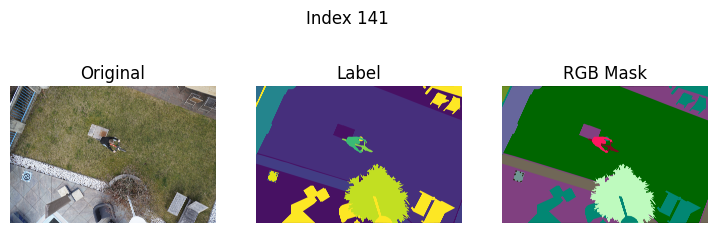

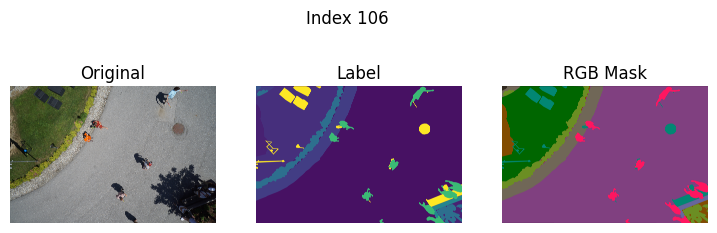

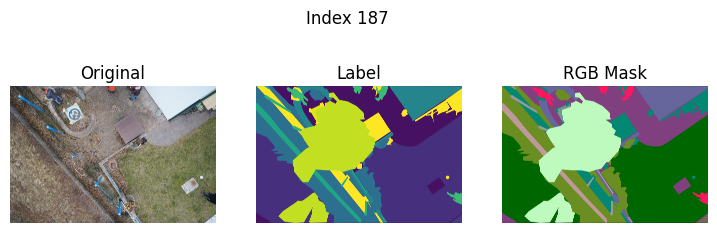

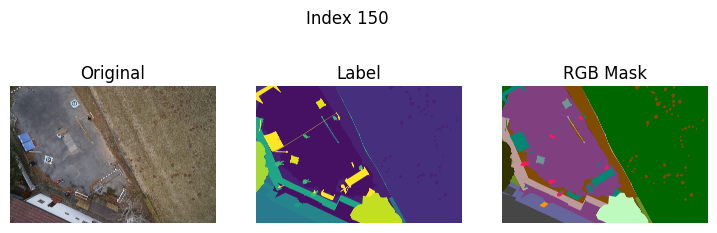

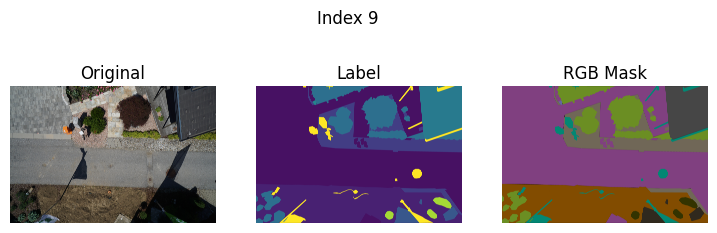

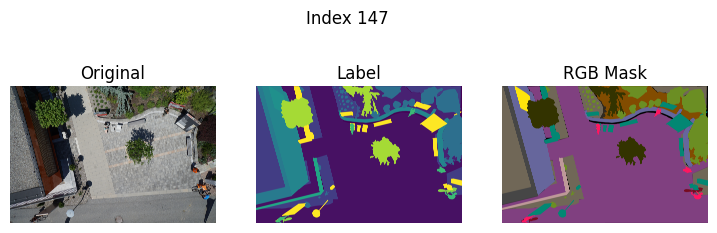

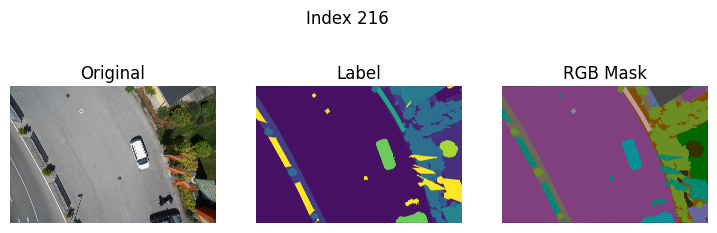

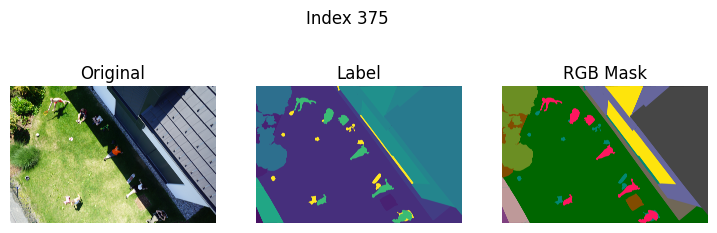

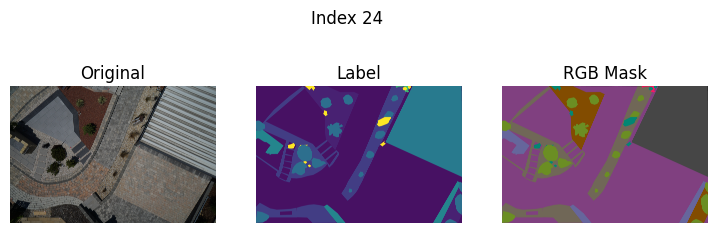

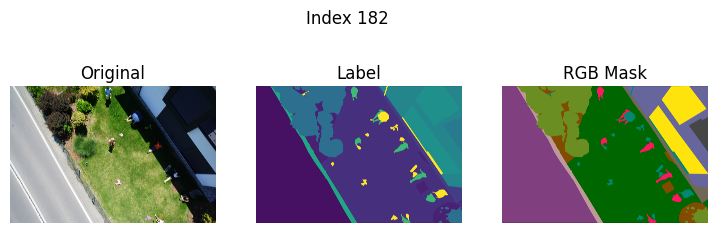

In [16]:
idxs = random.sample(range(len(orig_files)), 10)

for i in idxs:
    
    f_jpg = orig_files[i]
    f_png = os.path.splitext(f_jpg)[0] + ".png"

    img_orig = Image.open(os.path.join(paths["orig"], f_jpg))
    img_label = Image.open(os.path.join(paths["label"], f_png))
    img_rgb = Image.open(os.path.join(paths["rgb"], f_png))

    plt.figure(figsize=(9,3))
    plt.suptitle(f"Index {i}")
    plt.subplot(1,3,1); plt.imshow(img_orig); plt.title("Original"); plt.axis('off')
    plt.subplot(1,3,2); plt.imshow(img_label); plt.title("Label"); plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(img_rgb); plt.title("RGB Mask"); plt.axis('off')
    plt.show()


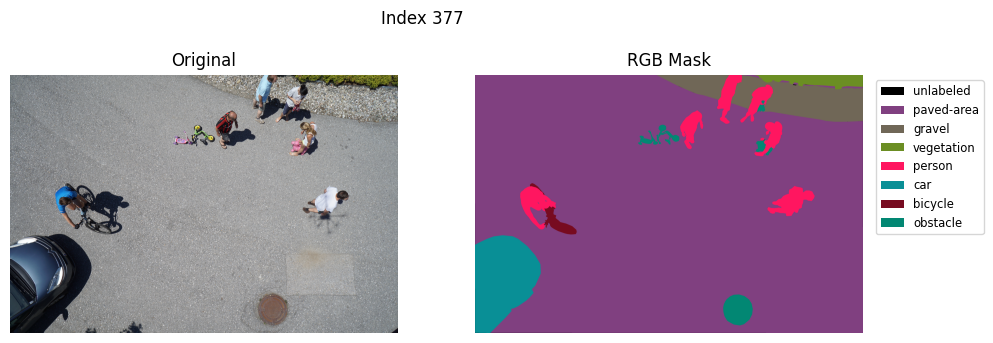

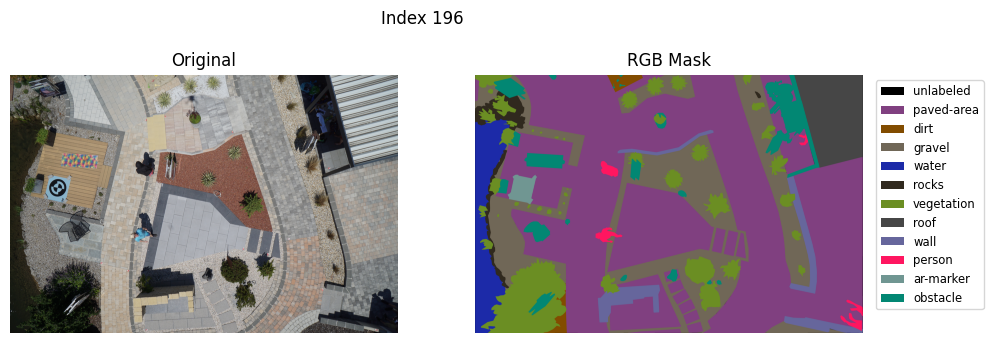

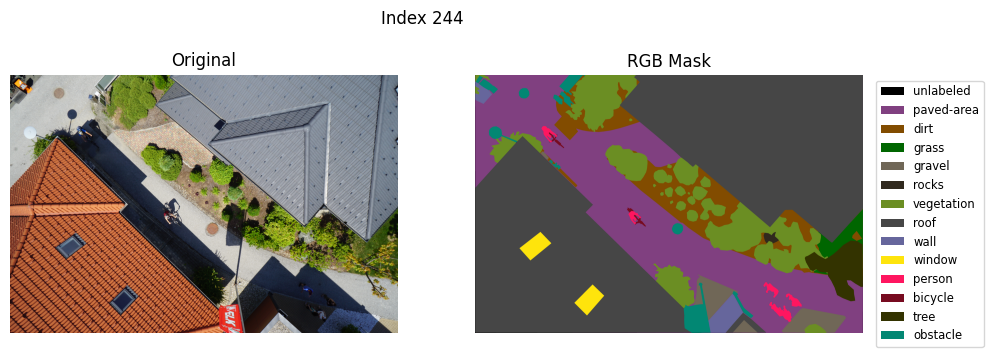

In [17]:
idxs = random.sample(range(len(orig_files)), 3)

for i in idxs:
    f_jpg = orig_files[i]
    f_png = os.path.splitext(f_jpg)[0] + ".png"

    img_orig = Image.open(os.path.join(paths["orig"], f_jpg))
    img_rgb = Image.open(os.path.join(paths["rgb"], f_png))
    arr = np.array(img_rgb).reshape(-1,3)
    unique_colors = {tuple(c) for c in arr}

    present = [(name,(r,g,b)) for name,(r,g,b) in color_items if (r,g,b) in unique_colors]

    plt.figure(figsize=(11,4))
    plt.suptitle(f"Index {i}")
    plt.subplot(1,2,1); plt.imshow(img_orig); plt.title("Original"); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(img_rgb); plt.title("RGB Mask"); plt.axis('off')

    handles = [Patch(facecolor=(r/255,g/255,b/255), label=name) for name,(r,g,b) in present]
    plt.legend(handles=handles, bbox_to_anchor=(1.02,1), loc='upper left', fontsize='small')
    plt.show()

# 2. Split train/test/valid

- Decide on a meaningful split between training/validation/testing data.
- Initially, you can “cheat” by setting validation==testing.

In [18]:
random.seed(42)
random.shuffle(orig_files)

In [21]:
train_end = int(0.7 * n_total)   
val_end = int(0.85 * n_total) # next 15% validation

# Split the files
train_files = orig_files[:train_end]
val_files = orig_files[train_end:val_end]
test_files = orig_files[val_end:]

In [22]:
# Save splits to CSV

base_path = "dataset"
pd.Series(train_files).to_csv(os.path.join(base_path, "train_files.csv"), index=False)
pd.Series(val_files).to_csv(os.path.join(base_path, "val_files.csv"), index=False)
pd.Series(test_files).to_csv(os.path.join(base_path, "test_files.csv"), index=False)

In [23]:
print(f"Total images: {n_total}")
print(f"Training: {len(train_files)}, Validation: {len(val_files)}, Test: {len(test_files)}")

Total images: 400
Training: 280, Validation: 60, Test: 60
